In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import operator 
import pygal

Reminder

    > Condition 1: Free + No Ad
    > Condition 2: Find + No Ad
    > Condition 3: Free + Skin
    > Condition 4: Find + Skin
    > Condition 5: Free + Skin/Mpu
    > Condition 6: Find + Skin/Mpu

In [2]:
root_dir = "../data/"
col = ['Mean_current_fix_x', 'Var_current_fix_x', 'Mean_current_fix_y',
        'Var_current_fix_y', 'Mean_fix_duration', 'Var_fix_duration',
       'Mean_next_sac_ampl', 'Var_next_sac_ampl', 'Mean_next_sac_dur', 'Var_next_sac_dur']
stats = pd.DataFrame(data = [[0 for i in range(10)] for i in range(6)], columns = col)

**Functions**

In [14]:
def Mean_fix_x(data):
    return(data["CURRENT_FIX_X"].mean())

def Var_fix_x(data):
    return(data["CURRENT_FIX_X"].var())

def Mean_fix_y(data):
    return(data["CURRENT_FIX_Y"].mean())

def Var_fix_y(data):
    return(data["CURRENT_FIX_Y"].var())

def Mean_fix_dur(data):
    return(data["CURRENT_FIX_DURATION"].mean())

def Var_fix_dur(data):
    return(data["CURRENT_FIX_DURATION"].var())

def Mean_next_sac_amp(data):
    return(data["NEXT_SAC_AMPLITUDE"].mean())

def Var_next_sac_amp(data):
    return(data["NEXT_SAC_AMPLITUDE"].var())

def Mean_next_sac_dur(data):
    return(data["NEXT_SAC_DURATION"].mean())

def Var_next_sac_dur(data):
    return(data["NEXT_SAC_DURATION"].var())

def Sum(l1,l2):
    n = len(l1)
    l_sum = [0 for i in range(n)]
    for i in range(n):
        l_sum[i] = l1[i] + l2[i]
    return(l_sum)

def quot(l1,k):
    return([j / k for j in(l1)])

def sum_int_list(l1,k):
    n = len(l1)
    l = [0 for i in range(n)]
    for i in range(n):
        l[i] = l[i] + 1
    return(l)

#def ecart(row):
#    fich = []
#    next_sac_end_x = row["NEXT_SAC_END_X"]
#    next_sac_end_y = row["NEXT_SAC_END_Y"]
#    fix_x = 
#    fix_y = 
  
    
# get row of unmatching coordinates 
def ecart(data):
    fich = data.values
    n = len(fich)
    error = []
    for i in range(n-1):
        ecart = (abs(fich[i][6] - fich[i+1][2]) + abs(fich[i][7] - fich[i+1][3]))/2
        if ecart:
            error.append([ecart, i])  
    error_m = np.array(error)
    return(error_m)

# get the row of very long saccades
def getposition(col1,thresh):
    l = []
    fich = col1.values
    n = len(col1)
    for i in range(n):
        if fich[i] > thresh :
            l.append(i)
    return(l)

def concord(data, thresh, col):
    l1 = getposition(col, thresh)
    l2 = ecart(data)
    l = []
    n1 = len(l1)
    n2 = len(l2)
    if n1 < n2:
        for i in range(n1):
            x = l1[i]
            for j in range(n2):
                if x == l2[j,1]:
                    l.append(x)
    else:
        for j in range(n2):
            x = l2[j,1]
            for i in range(n1):
                if l1[i] == x:
                    l.append(x)
    return(l)

In [4]:
stats

,Mean_current_fix_x,Var_current_fix_x,Mean_current_fix_y,Var_current_fix_y,Mean_fix_duration,Var_fix_duration,Mean_next_sac_ampl,Var_next_sac_ampl,Mean_next_sac_dur,Var_next_sac_dur
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0


In [6]:
fich = stats.values
k = [0 for i in range(6)]

In [7]:
for filename in os.listdir(root_dir):
    path = root_dir+filename+"/"+filename
    df = pd.read_csv(path+"_check.csv")
    
    Cond_1 = df["CONDITION"] == 1
    Cond_2 = df["CONDITION"] == 2
    Cond_3 = df["CONDITION"] == 3
    Cond_4 = df["CONDITION"] == 4
    Cond_5 = df["CONDITION"] == 5
    Cond_6 = df["CONDITION"] == 6
    
    data1 = df[Cond_1]
    data2 = df[Cond_2]
    data3 = df[Cond_3]
    data4 = df[Cond_4]
    data5 = df[Cond_5]
    data6 = df[Cond_6]
    
    i = 0
    for dataframe in (data1, data2, data3, data4, data5, data6):
        if (dataframe.empty == False):
            l1 = [j * k[i] for j in(fich[i])]
            l2 = [Mean_fix_x(dataframe), Var_fix_x(dataframe), Mean_fix_y(dataframe), Var_fix_y(dataframe),
             Mean_fix_dur(dataframe), Var_fix_dur(dataframe), Mean_next_sac_amp(dataframe), Var_next_sac_amp(dataframe),
             Mean_next_sac_dur(dataframe), Var_next_sac_dur(dataframe)]

            fich[i] = quot(Sum(l1, l2), k[i] + 1)
            k[i] = k[i] + 1
        else:
            print(path + "_check.csv")

        i = i + 1

../data/part_710/part_710_check.csv
../data/part_710/part_710_check.csv
../data/part_712/part_712_check.csv
../data/part_712/part_712_check.csv
../data/part_713/part_713_check.csv


FileNotFoundError: File b'../data/with_blink/with_blink_check.csv' does not exist

In [ ]:
stats = pd.DataFrame(data = fich[:,:], columns = col)
stats

On remarque déjà que la position des yeux sur l'écran ne diffère pas vraiment selon les conditions d'étude. La durée de fixation est plus importante en moyenne en Target qu'en Free, les pubs n'influent pas sur le temps de concentration.

Comportement latéral des yeux influencé.

In [ ]:
raise Value Error

In [ ]:
path = root_dir + 'part_713/part_713'
df = pd.read_csv(path + "_clean.csv")

Cond_1 = df["CONDITION"] == 1
Cond_2 = df["CONDITION"] == 2
Cond_3 = df["CONDITION"] == 3
Cond_4 = df["CONDITION"] == 4
Cond_5 = df["CONDITION"] == 5
Cond_6 = df["CONDITION"] == 6

k = [0 for i in range(6)]

data1 = df[Cond_1]
data2 = df[Cond_2]
data3 = df[Cond_3]
data4 = df[Cond_4]
data5 = df[Cond_5]
data6 = df[Cond_6]

i = 0
for dataframe in (data1, data2, data3, data4, data5, data6):
    if (dataframe.empty == False):
        l1 = [j * k[i] for j in(fich[i])]
        l2 = [Mean_fix_x(dataframe), Var_fix_x(dataframe), Mean_fix_y(dataframe), Var_fix_y(dataframe),
         Mean_fix_dur(dataframe), Var_fix_dur(dataframe), Mean_next_sac_amp(dataframe), Var_next_sac_amp(dataframe),
         Mean_next_sac_dur(dataframe), Var_next_sac_dur(dataframe)]

        fich[i] = quot(Sum(l1, l2), k[i] + 1)
        k[i] = k[i] + 1

    i = i + 1

print(fich)

In [ ]:
df.head()

**Outliers' detection**

In [10]:
partID = 713
Trial = 17

In [11]:
path = root_dir + 'part_{0}/part_{0}'.format(partID)
df = pd.read_csv(path + "_check.csv")
data = df[df["TRIAL_INDEX"] == Trial]
data

,TRIAL_INDEX,EYE_USED,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_DURATION,NEXT_SAC_END_X,NEXT_SAC_END_Y,NEXT_SAC_AMPLITUDE,NEXT_SAC_DIRECTION,NEXT_SAC_DURATION,NEXT_SAC_ANGLE,NEXT_SAC_AVG_VELOCITY,PART_ID,DATETIME,OFFSET,Y_OFFSET,WEBSITE_ID,CONDITION
826,17,RIGHT,831.0,732.6,29,153,954.1,664.7,3.89,RIGHT,49.0,27.56,79.46,713,2018-03-27 11:23:01.021,0,732.6,3,1
827,17,RIGHT,948.0,654.3,231,198,1321.3,824.0,11.40,RIGHT,61.0,-24.22,186.90,713,2018-03-27 11:23:01.223,0,654.3,3,1
828,17,RIGHT,1315.5,825.0,490,260,1329.8,748.9,2.18,UP,36.0,78.14,60.49,713,2018-03-27 11:23:01.482,0,825.0,3,1
829,17,RIGHT,1324.7,756.6,786,350,1346.3,808.9,1.56,DOWN,20.0,-68.57,77.76,713,2018-03-27 11:23:01.778,0,756.6,3,1
830,17,RIGHT,1342.2,807.4,1156,175,1281.9,1036.5,6.22,DOWN,38.0,-104.58,163.65,713,2018-03-27 11:23:02.148,0,807.4,3,1
831,17,RIGHT,1278.4,1026.5,1369,125,935.4,681.4,13.05,LEFT,72.0,135.87,181.32,713,2018-03-27 11:23:02.361,0,1026.5,3,1
832,17,RIGHT,927.7,679.9,1566,412,871.8,784.0,3.43,DOWN,53.0,-113.03,64.63,713,2018-03-27 11:23:02.558,0,679.9,3,1
833,17,RIGHT,860.7,752.0,2031,530,1019.7,659.1,4.69,RIGHT,42.0,15.38,111.58,713,2018-03-27 11:23:03.023,0,752.0,3,1
834,17,RIGHT,1005.5,646.0,2603,481,1043.0,575.5,1.43,RIGHT,20.0,40.44,71.27,713,2018-03-27 11:23:03.595,0,646.0,3,1
835,17,RIGHT,1038.7,574.3,3104,312,851.8,585.2,5.33,LEFT,49.0,-174.16,108.79,713,2018-03-27 11:23:04.096,119,693.3,3,1


In [15]:
col1 = data.CURRENT_FIX_X.dropna()
col2 = data.CURRENT_FIX_Y.dropna()
col3 = data.CURRENT_FIX_DURATION.dropna()
col4 = data.NEXT_SAC_AMPLITUDE.dropna()
col5 = data.NEXT_SAC_DURATION.dropna()
col6 = ecart(data)[:,0]

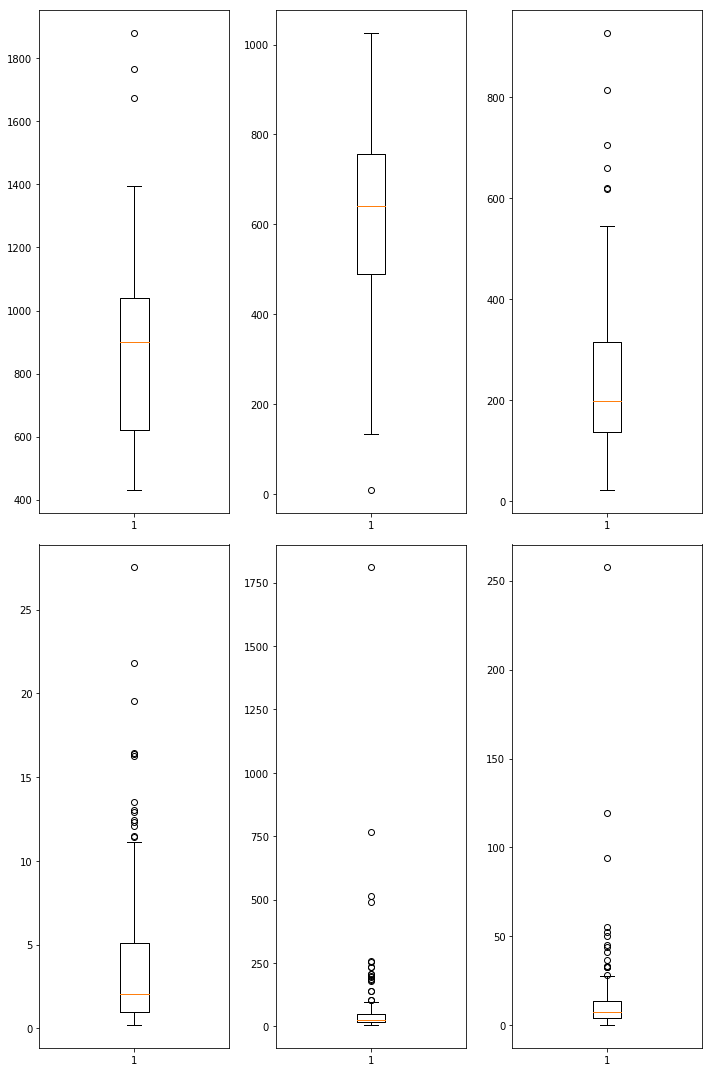

In [16]:
fig=plt.figure(figsize = (10,15))

i = 1
for col in(col1, col2, col3, col4, col5,col6):
    ax=fig.add_subplot(2,3,i)        
    ax.boxplot(col)    
    i = i+1
    
plt.subplots_adjust(left = 1, right = 1.5)
fig.tight_layout()
plt.show()

In [ ]:
thresh = 100
concord(data, thresh, col5)

In [13]:
ecart(data)

array([[ 45.15,  24.  ],
       [ 32.95,  42.  ],
       [ 32.7 ,  46.  ],
       [ 32.65,  68.  ],
       [ 41.25,  69.  ],
       [ 50.4 ,  73.  ],
       [ 36.5 ,  91.  ],
       [ 93.95,  97.  ],
       [ 33.3 , 103.  ],
       [ 52.75, 112.  ],
       [ 55.55, 124.  ],
       [119.35, 160.  ],
       [ 43.85, 162.  ],
       [257.45, 174.  ]])

In [ ]:
raise ValueError

## Participant 1

In [ ]:
# Jerks (saccades) with high duration
Thresh = data.NEXT_SAC_DURATION > 800
df = data[Thresh]
df

Clignement d'oeil ?

In [ ]:
data_ = data.iloc [[217,218,219]]
data_

### Trial 4

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

Corrélation longue saccade et faible amplitude : perte de concentration ?

### Trial 7

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

In [ ]:
data

la ligne 1390 est bizarre

### Trial 9

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

In [ ]:
data.iloc[[97,98,99]]

Problème... 300 pixels de différence en X et Y entre la fin de la saccade 1744 et le début de la fixation 1745.

### Trial 10

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

In [ ]:
data.iloc[[54,55]]

Cette valeur extrême correspond à la fin de l'enregistrement

### Trial 11

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 1000
df = data[Thresh]
df

In [ ]:
data.iloc[[41,42,43]]

La dernière ligne est incorrecte et ne correspond pas avec la fin de la saccade observée avant.

## Participant 2

### Trial 14

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 150
df = data[Thresh]
df

In [ ]:
data.iloc[[143,144,145]]

Clignement d'oeil.

## Participant 3

### Trial 13

In [ ]:
# Fixations with weird Coordinates
Tresh = data.CURRENT_FIX_Y < 100
df = data[Tresh]
df

In [ ]:
data.iloc[[229,230,231]]

Sortie d'écran comme on voit row 1633: NEXT_SAC_END_Y négatif

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

In [ ]:
data.iloc  [[148,149,150,151]]

Problème avec la row 1553

### Trial 17

In [ ]:
# Fixation with weird coordinates
Tresh = data.CURRENT_FIX_Y < 100
df = data[Tresh]
df

In [ ]:
data.iloc[[51,52,53]]

RAS

## Participant 710

### Trial 7

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

Dernière row

### Trial 9

In [ ]:
# Jerks (saccades) with very high durations
Thresh = data.NEXT_SAC_DURATION > 300
df = data[Thresh]
df

In [ ]:
data.iloc[[177,178,179]]

### Trial 16

In [ ]:
# Fixations with weird Coordinates
Tresh = data.CURRENT_FIX_DURATION > 1000
df = data[Tresh]
df

## Participant 712

### Trial 5

In [ ]:
# Fixations with high duration
Tresh = data.CURRENT_FIX_DURATION > 1000
df = data[Tresh]
df

In [ ]:
data.iloc[[146,147,148]]

In [ ]:
# Jerks (saccades) with high duration
Thresh = data.NEXT_SAC_DURATION > 200
df = data[Thresh]
df

In [ ]:
data.iloc[[124,125,126]]

### Trial 6

In [ ]:
# Jerks (saccades) with high amplitude
Thresh = data.NEXT_SAC_AMPLITUDE > 30
df = data[Thresh]
df

In [ ]:
data.iloc[[53,54,55]]

### Trial 9

In [ ]:
ecart(data)[:6]

In [ ]:
data.iloc[[222,223,224]]

### Trial 15

In [ ]:
ecart(data)[:2]

In [ ]:
data.iloc[[72,73,74]]

row 745 clignement d'oeil ?

### Trial 18

In [ ]:
ecart(data)[1]

In [ ]:
data.iloc[[8,9,10]]

## Participant 713 

### Trial 4

In [ ]:
# Jerks (saccades) with high duration
Thresh = data.NEXT_SAC_DURATION > 200
df = data[Thresh]
df

In [ ]:
data.iloc[[44,45,46]]

### Trial 6

In [ ]:
data.iloc[[56,57,58,59]]

Problème row 150 : longue saccade plus décalage.

### Trial 8

In [ ]:
data.iloc[[62,63,64]]

### Trial 11

à supprimer ?

In [ ]:
# Jerks (saccades) with high duration
Thresh = data.NEXT_SAC_DURATION > 150
df = data[Thresh]
df

In [ ]:
ecart(data)

### Trial 13

In [ ]:
data.iloc[[21,22,23]]

Léger décalage

### Trial 17

In [ ]:
data.iloc[[23,24,25]]103.0, 124.0, 174.0

In [ ]:
data.iloc[[67,68,69]]

In [ ]:
data.iloc[[123,124,125]]

In [ ]:
data.iloc[[173,174,175]]

J'ai trouvé le chien galeux !